# Logistic classifier

The logistic classifier, in contrast with the perceptron classifier, doesn’t give definite answers. The perceptron classifier would say, “I am 100% sure that this point is happy,” whereas the logistic classifier says, “Your point has a 73% probability of being happy and 27% of being sad.

Although the goal of the perceptron classifier is to be correct as many times as possible, the goal of the logistic classifier is to assign to each point the highest possible probability of having the correct label

In a nutshell, a logistic classifier is a type of model that works just like a perceptron classifier, except instead of returning a yes or no answer, it returns a number between 0 and 1.

we learn the logistic regression algorithm, which works in a similar way. The main differences follow:

The step function is replaced by a new activation function, which returns values between 0 and 1.
The perceptron error function is replaced by a new error function, which is based on a probability calculation.
The perceptron trick is replaced by a new trick, which improves the classifier based on this new error function.

Logistic classifiers: A continuous version of perceptron classifiers

The output of a logistic classifier can be interpreted as a score, and the goal of the logistic classifier is to assign scores as close as possible to the label of the points—points with label 0 should get scores close to 0, and points with label 1 should get scores close to 1.

We can visualize continuous perceptrons similar to discrete perceptrons: with a line (or high-dimensional plane) that separates two classes of data. The only difference is that the discrete perceptron predicts that everything to one side of the line has label 1 and to the other side has label 0, whereas the continuous perceptron assigns a value from 0 to 1 to all the points based on their position with respect to the line. Every point on the line gets a value of 0.5. This value means the model can’t decide if the sentence is happy or sad. For example, in the ongoing sentiment analysis example, the sentence “Today is Tuesday” is neither happy nor sad, so the model would assign it a score close to 0.5. Points in the positive zone get scores larger than 0.5, where the points even farther away from the 0.5 line in the positive direction get values closer to 1. Points in the negative zone get scores smaller than 0.5, where, again, the points farther from the line get values closer to 0. No point gets a value of 1 or 0 (unless we consider points at infinity), as shown in figure 6.1.

Tomamos una función que recibe la puntuación como entrada y genera un número entre 0 y 1. El número está cerca de 1 si la puntuación es positiva y cerca de cero si es negativa. Si la puntuación es cero, la salida es 0,5.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dominio de las funciones
x = np.linspace(-10, 10, 1000)

# Función escalón
def step_function(x):
    # devuelve un array donde:
    # Si el valor de x es mayor o igual a 0, pone un 1.
    # Si el valor de x es menor que 0, pone un 0.
    return np.where(x >= 0, 1, 0)

# Función sigmoide
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Gráfica de la función escalón
axs[0].plot(x, step_function(x), color='black', linewidth=2)
axs[0].set_title('Step function\n(discrete)')
axs[0].set_ylim(-0.5, 1.5)
axs[0].set_xticks([0])
axs[0].set_yticks([0, 1])
axs[0].grid(True, linestyle='--', alpha=0.5)
axs[0].axhline(1, linestyle='-', color='black')
axs[0].axhline(0, linestyle='-', color='black')
axs[0].axvline(0, linestyle='-', color='black')
axs[0].plot(0, 1, 'ko')  # punto cerrado
axs[0].plot(0, 0, 'wo', markeredgecolor='black')  # punto abierto

# Gráfica de la función sigmoide
axs[1].plot(x, sigmoid_function(x), color='black', linewidth=2)
axs[1].set_title('Sigmoid function\n(continuous)')
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xticks([0])
axs[1].set_yticks([0, 1])
axs[1].grid(True, linestyle='--', alpha=0.5)
axs[1].axhline(1, linestyle='dotted', color='black')
axs[1].axvline(0, linestyle='-', color='black')

plt.tight_layout()
plt.show()



print(sigmoid_function(np.array([-5, -1, 0,  1, 5])))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sigmoide fuction
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def absoluted_error(prediction, target):
    return np.abs(prediction - target)

def squared_error(prediction, target):
    return (prediction - target) ** 2

# Data
features = np.array([[3, 2], [1, 2], [0, 1], [2, 0]])
target = [0, 1, 1, 0]

# Random weights and bias
weights = np.array([1, 2])
bias = -4

# Predictions of the random weights and bias
logits = features.dot(weights) + bias
predict = sigmoid_function(logits)
absolute_errors = absoluted_error(predict, target)
squared_errors = squared_error(predict, target)
probability_being_its_label = [p if t == 1 else 1 - p for t, p in zip(target, predict)]

# Calculate log loss from probability being its label
log_loss = -np.log(probability_being_its_label)

# Calculate log loss directly from target and predict
log_loss = [-t * np.log(p) - (1 - t) * np.log(1 - p)  for t, p in zip(target, predict)]



# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-1, 4.5)
ax.set_ylim(-0.5, 3.5)

# Draw points
for i, (point, label, prob) in enumerate(zip(features, target, predict)):
    x, y = point
    emoji = "😠" if label == 0 else "😊"
    color = "red" if label == 0 else "green"
    
    ax.text(x, y, emoji, fontsize=20, ha='center', va='center', color=color)
    ax.text(x, y + 0.2, f"Point {i+1}", fontsize=10, ha='center')
    ax.text(x, y - 0.4, f"Label: {label}\nPrediction: {prob:.3f}", 
            fontsize=9, ha='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray", alpha=0.6))

# Línea de decisión: w1*x1 + w2*x2 + b = 0 → x2 = -(w1*x1 + b)/w2
# x_vals = np.linspace(-1, 5, 100)
# y_vals = -(weights[0] * x_vals + bias) / weights[1]
# ax.plot(x_vals, y_vals, 'k-', label='Decision Boundary')

ax.set_xlabel("$x_{aack}$ → Happy / Sad")
ax.set_ylabel("$x_{beep}$")
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_yticks([0, 1, 2, 3])
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend()

plt.title("Clasificación con línea de decisión (sigmoide)")
plt.tight_layout()
plt.show()

pd.DataFrame({
    "point": features.tolist(),
    "label": target,
    "prediction": predict.tolist(),
    "Error": ["Should be large", "Should be small", "Should be large", "Should be small"],
    "Absolute Error": absolute_errors.tolist(),
    "Squared Error": squared_errors.tolist(),
    "Probability being its label": probability_being_its_label,
    "Log Loss": log_loss
})

## The error functions: Absolute, square, and log loss

In this section, we build three error functions for a logistic classifier. What properties would you like a good error function to have? Some examples follow:

- If a point is correctly classified, the error is a small number.
- If a point is incorrectly classified, the error is a large number.
- ñThe error of a classifier for a set of points is the sum (or average) of the errors at all the points.

- The points on the line are given a prediction of 0.5.
- Points that are in the positive zone are given predictions higher than 0.5, and the farther a point is from the line in that direction, the closer its prediction is to 1.
- Points that are in the negative zone are given predictions lower than 0.5, and the farther a point is from the line in that direction, the closer its prediction is to 0.

## Error function 3: log loss

The log loss is the most widely used error function for continuous perceptrons.

When events are independent, the probability of them occurring simultaneously is the product of their probabilities. If we assume that the four predictions are independent, then the probability that this model assigns to the labels “sad, happy, happy, sad” is the product of the four numbers, which is 0.047 · 0.731 · 0.119 · 0.881 = 0.004.

Luckily for us, we have a convenient way to turn products into sums—using the logarithms. For this entire book, all we need to know about the logarithm is that it turns products into sums. More specifically, the logarithm of a product of two numbers is the sum of the logarithms of the numbers, as shown next:

ln(a · b) = ln(a) + ln(b)

If we apply the natural logarithm to our product of probabilities, we obtain

ln(0.047 · 0.731 · 0.119 · 0.881) = ln(0.047) + ln(0.731) + ln(0.119) + ln(0.881) = –5.616.

One small detail. Notice that the result is a negative number. In fact, this will always be the case, because the logarithm of a number between 0 and 1 is always negative. Thus, if we take the negative logarithm of the product of probabilities, it is always a positive number.


To summarize, the steps for calculating the log loss follow:

- For each point, we calculate the probability that the classifier gives its label.
- For the happy points, this probability is the score.
- For the sad points, this probability is 1 minus the score.
- We multiply all these probabilities to obtain the total probability that the classifier has given to these labels.
- We apply the natural logarithm to that total probability.
- The logarithm of a product is the sum of the logarithms of the factors, so we obtain a sum of logarithms, one for each point.
- We notice that all the terms are negative, because the logarithm of a number less than 1 is a negative number. Thus, we multiply everything by –1 to get a sum of positive numbers.
- This sum is our log loss.

log loss = –y ln(ŷ) – (1 – y) ln(1 – ŷ)

The previous formula works because if the label is 0, the first summand is 0, and if the label is 1, the second summand is 0. We use the term log loss when we refer to the log loss of a point or of a whole dataset. The log loss of a dataset is the sum of the log losses at every point.

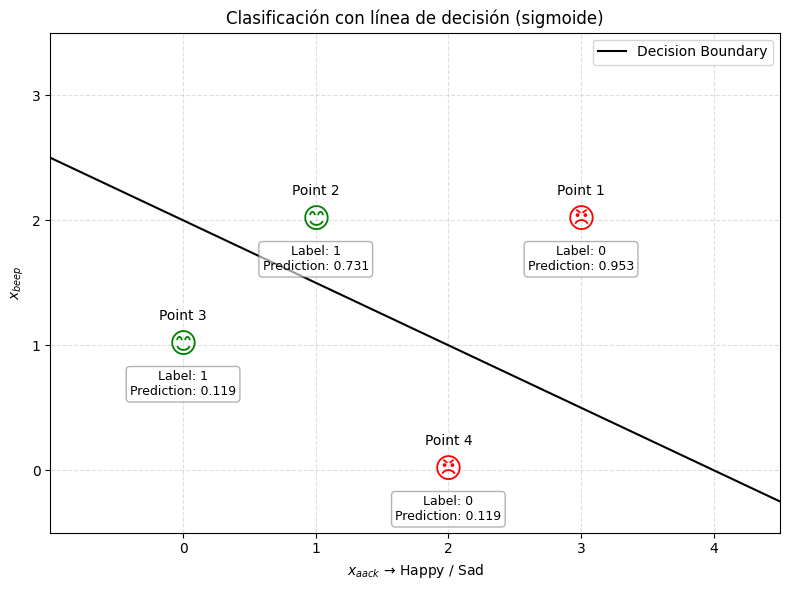

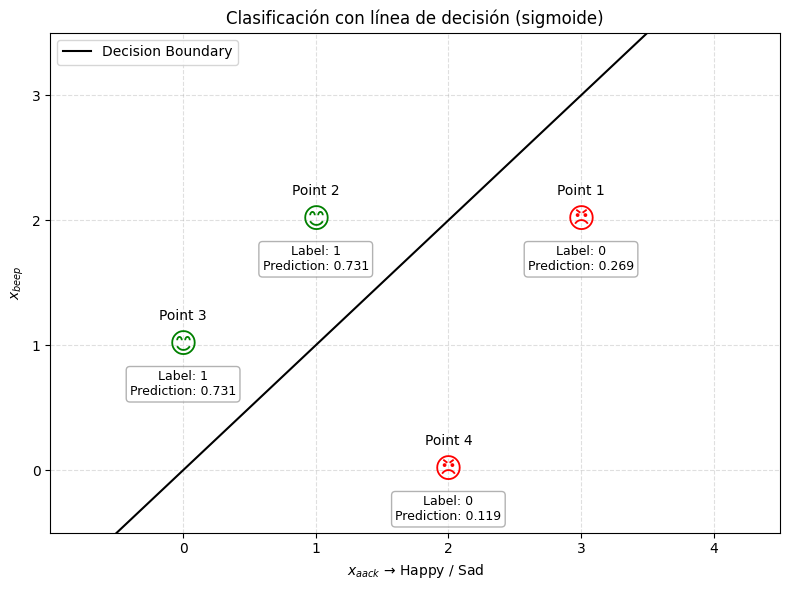

Cl1 Log Loss: 5.616
Cl2 Log Loss: 1.067


,label,cl1_predicts,cl2_predicts,cl1_log_loss,cl2_log_loss
0,0,0.952574,0.268941,3.048587,0.313262
1,1,0.731059,0.731059,0.313262,0.313262
2,1,0.119203,0.731059,2.126928,0.313262
3,0,0.119203,0.119203,0.126928,0.126928


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sigmoide fuction
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def log_loss(target, predict):
    return [-t * np.log(p) - (1 - t) * np.log(1 - p)  for t, p in zip(target, predict)]

def plot_line(features, target, predict, weights, bias):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 4.5)
    ax.set_ylim(-0.5, 3.5)

    # Draw points
    for i, (point, label, prob) in enumerate(zip(features, target, predict)):
        x, y = point
        emoji = "😠" if label == 0 else "😊"
        color = "red" if label == 0 else "green"
        
        ax.text(x, y, emoji, fontsize=20, ha='center', va='center', color=color)
        ax.text(x, y + 0.2, f"Point {i+1}", fontsize=10, ha='center')
        ax.text(x, y - 0.4, f"Label: {label}\nPrediction: {prob:.3f}", 
                fontsize=9, ha='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray", alpha=0.6))

    # Línea de decisión: w1*x1 + w2*x2 + b = 0 → x2 = -(w1*x1 + b)/w2
    x_vals = np.linspace(-1, 5, 100)
    y_vals = -(weights[0] * x_vals + bias) / weights[1]
    ax.plot(x_vals, y_vals, 'k-', label='Decision Boundary')

    ax.set_xlabel("$x_{aack}$ → Happy / Sad")
    ax.set_ylabel("$x_{beep}$")
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_yticks([0, 1, 2, 3])
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend()

    plt.title("Clasificación con línea de decisión (sigmoide)")
    plt.tight_layout()
    plt.show()


features = np.array([[3, 2], [1, 2], [0, 1], [2, 0]])
target = [0, 1, 1, 0]


cl1_weights = np.array([1, 2])
cl1_bias = -4


cl2_weights = np.array([-1, 1])
cl2_bias = 0

# Predictions of the random weights and bias
cl1_scores= features.dot(cl1_weights) + cl1_bias
cl1_predicts = sigmoid_function(cl1_scores)
cl1_log_loss = log_loss(target, cl1_predicts)

cl2_scores= features.dot(cl2_weights) + cl2_bias
cl2_predicts = sigmoid_function(cl2_scores)
cl2_log_loss = log_loss(target, cl2_predicts)

plot_line(features, target, cl1_predicts, cl1_weights, cl1_bias)
plot_line(features, target, cl2_predicts, cl2_weights, cl2_bias)

print(f"Cl1 Log Loss: {sum(cl1_log_loss):.3f}")
print(f"Cl2 Log Loss: {sum(cl2_log_loss):.3f}")

pd.DataFrame({
    "label": target,
    "cl1_predicts": cl1_predicts.tolist(),
    "cl2_predicts": cl2_predicts.tolist(),
    "cl1_log_loss": cl1_log_loss,
    "cl2_log_loss": cl2_log_loss
})